In [1]:
# 환경 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts -nanum

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath, size = 9)
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager._rebuild()

E: Command line option 'n' [from -nanum] is not understood in combination with the other options.


In [2]:
# 사용 패키지 불러오기
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 구글 코랩에 파일 불러오기
from google.colab import files
files.upload()

Saving KakaoTalk_.txt to KakaoTalk_.txt


{'KakaoTalk_.txt': b"\xec\xb9\xb4\xec\xb9\xb4\xec\x98\xa4\xed\x86\xa1 \xec\x84\xa0\xeb\xac\xbc\xed\x95\x98\xea\xb8\xb0 \xeb\x8b\x98\xea\xb3\xbc \xec\xb9\xb4\xec\xb9\xb4\xec\x98\xa4\xed\x86\xa1 \xeb\x8c\x80\xed\x99\x94\r\n\xec\xa0\x80\xec\x9e\xa5\xed\x95\x9c \xeb\x82\xa0\xec\xa7\x9c : 2021-01-26 23:55:39\r\n\r\n--------------- 2020\xeb\x85\x84 5\xec\x9b\x94 20\xec\x9d\xbc \xec\x88\x98\xec\x9a\x94\xec\x9d\xbc ---------------\r\n[\xec\xb9\xb4\xec\xb9\xb4\xec\x98\xa4\xed\x86\xa1 \xec\x84\xa0\xeb\xac\xbc\xed\x95\x98\xea\xb8\xb0] [\xec\x98\xa4\xec\xa0\x84 10:40] (\xea\xb4\x91\xea\xb3\xa0)\xec\xa2\x8b\xec\x95\x84\xec\x9a\x94\xe2\x9d\xa4\xef\xb8\x8f\xeb\xa5\xbc \xeb\xb6\x80\xeb\xa5\xb4\xeb\x8a\x94 \xec\x9e\x90\xeb\x9e\x91\xed\x95\x98\xea\xb3\xa0 \xec\x8b\xb6\xec\x9d\x80 \xec\x84\xa0\xeb\xac\xbc\r\n--------------- 2020\xeb\x85\x84 7\xec\x9b\x94 2\xec\x9d\xbc \xeb\xaa\xa9\xec\x9a\x94\xec\x9d\xbc ---------------\r\n[\xec\xb9\xb4\xec\xb9\xb4\xec\x98\xa4\xed\x86\xa1 \xec\x84\xa0\xeb\xac\xbc\xed\x95

In [5]:
data = open('KakaoTalk_.txt', 'r')

In [6]:
# readlines() : 텍스트를 통째로 가녀오는 것으로 새로운 변수에 선언
df = data.readlines()

list = []   # 반목문을 돌리기 위해 빈 list 만들기

for i in df :
  i = i.rstrip('\n')
  i = i.strip()
  list.append(i)  # append를 이용해 빈 list에 쌓기

In [7]:
# 위 리스트를 갖고 데이터 프레임 제작
list_drop = list[4:]

In [8]:
col_names = ['words']

In [9]:
df = pd.DataFrame(list_drop, columns=col_names)
df.head()

,words
0,[카카오톡 선물하기] [오전 10:40] (광고)좋아요❤️를 부르는 자랑하고 싶은 선물
1,--------------- 2020년 7월 2일 목요일 ---------------
2,[카카오톡 선물하기] [오전 9:23] (광고)이 기회에 1인 1빙수 어때요?🍧
3,--------------- 2020년 7월 8일 수요일 ---------------
4,[카카오톡 선물하기] [오후 7:38] (광고)선물 랭킹쇼! 지금 바로 시작합니다🎁


In [10]:
df['kakao'] = df['words'].apply(lambda x : re.sub('[^가-힣]', ' ', x))

In [11]:
df.head()

,words,kakao
0,[카카오톡 선물하기] [오전 10:40] (광고)좋아요❤️를 부르는 자랑하고 싶은 선물,카카오톡 선물하기 오전 광고 좋아요 를 부르는 자랑하고 싶은 선물
1,--------------- 2020년 7월 2일 목요일 ---------------,년 월 일 목요일
2,[카카오톡 선물하기] [오전 9:23] (광고)이 기회에 1인 1빙수 어때요?🍧,카카오톡 선물하기 오전 광고 이 기회에 인 빙수 어때요
3,--------------- 2020년 7월 8일 수요일 ---------------,년 월 일 수요일
4,[카카오톡 선물하기] [오후 7:38] (광고)선물 랭킹쇼! 지금 바로 시작합니다🎁,카카오톡 선물하기 오후 광고 선물 랭킹쇼 지금 바로 시작합니다


In [12]:
pip install soynlp

     |████████████████████████████████| 419kB 11.0MB/s 


In [13]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency = 100,
     min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
      )
word_extractor.train(df['kakao'].values) # list of str or like
words = word_extractor.extract()

training was done. used memory 0.141 Gb
all cohesion probabilities was computed. # words = 0
all branching entropies was computed # words = 152
all accessor variety was computed # words = 152


In [14]:
from soynlp.tokenizer import LTokenizer

from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word : score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores = cohesion_score)

In [15]:
df['tokenizer'] = df['kakao'].apply(lambda x : tokenizer.tokenize(x, remove_r= True))

In [16]:
words = []
for i in df['tokenizer'].values : 
  for k in i : 
    words.append(k)

In [17]:
words

['카카오톡',
 '선물하기',
 '오전',
 '광고',
 '좋아요',
 '를',
 '부르는',
 '자랑하고',
 '싶은',
 '선물',
 '년',
 '월',
 '일',
 '목요일',
 '카카오톡',
 '선물하기',
 '오전',
 '광고',
 '이',
 '기회에',
 '인',
 '빙수',
 '어때요',
 '년',
 '월',
 '일',
 '수요일',
 '카카오톡',
 '선물하기',
 '오후',
 '광고',
 '선물',
 '랭킹쇼',
 '지금',
 '바로',
 '시작합니다',
 '년',
 '월',
 '일',
 '월요일',
 '카카오톡',
 '선물하기',
 '오전',
 '광고',
 '에어팟',
 '프로의',
 '주인공',
 '이번엔',
 '나',
 '년',
 '월',
 '일',
 '화요일',
 '카카오톡',
 '선물하기',
 '오전',
 '광고',
 '월',
 '일',
 '실버데이는',
 '마음을',
 '싣고',
 '년',
 '월',
 '일',
 '일요일',
 '카카오톡',
 '선물하기',
 '오후',
 '광고',
 '크게',
 '한',
 '방이',
 '필요한',
 '순간',
 '년',
 '월',
 '일',
 '일요일',
 '카카오톡',
 '선물하기',
 '오전',
 '광고',
 '프렌즈',
 '니가',
 '왜',
 '거기서',
 '나와',
 '년',
 '월',
 '일',
 '월요일',
 '카카오톡',
 '선물하기',
 '오후',
 '상품',
 '배송이',
 '시작되었습니다',
 '년',
 '월',
 '일',
 '화요일',
 '카카오톡',
 '선물하기',
 '오후',
 '배송확인',
 '안내입니다',
 '년',
 '월',
 '일',
 '수요일',
 '카카오톡',
 '선물하기',
 '오전',
 '광고',
 '따뜻한',
 '사람에게만',
 '보여요',
 '년',
 '월',
 '일',
 '금요일',
 '카카오톡',
 '선물하기',
 '오전',
 '광고',
 '깨끗한',
 '햄에',
 '어울리는',
 '디자인을',
 '골라주세요',
 '년',
 '월',
 '일',
 '목요

In [18]:
from collections import Counter

In [19]:
count = Counter(words)
words_dict = dict(count)

In [20]:
words_dict

{'가격에': 1,
 '가벼운': 1,
 '가세요': 1,
 '가장': 1,
 '가족에게': 1,
 '가지로': 1,
 '갖고': 1,
 '개': 2,
 '개나': 1,
 '개선이': 1,
 '개정': 1,
 '갤럭시': 1,
 '거기서': 1,
 '거였어': 1,
 '걸어줄': 1,
 '걸치는': 1,
 '검색': 1,
 '게': 1,
 '게임으로': 1,
 '겨울이': 1,
 '결제완료': 1,
 '경험': 1,
 '계세요': 1,
 '계신가요': 1,
 '계획': 1,
 '고민은': 1,
 '고수들의': 1,
 '고통': 1,
 '골라주세요': 1,
 '곳에': 1,
 '관심과': 1,
 '광고': 66,
 '광희가': 1,
 '광희치킨': 1,
 '괜찮아요': 1,
 '귀성': 1,
 '귀한': 1,
 '그날까지': 1,
 '그리운': 1,
 '그만': 1,
 '금액대별': 1,
 '금요일': 14,
 '기록': 1,
 '기회는': 1,
 '기회에': 1,
 '길도': 1,
 '깨끗한': 1,
 '꼭': 2,
 '끝나기': 1,
 '나': 1,
 '나는': 1,
 '나도': 2,
 '나랑': 1,
 '나에게': 1,
 '나와': 1,
 '날': 1,
 '내가': 1,
 '내년': 1,
 '네': 1,
 '네고할': 1,
 '년': 73,
 '년의': 1,
 '놓치면': 1,
 '누구': 1,
 '눈': 1,
 '느껴지는': 1,
 '늦추죠': 1,
 '니가': 2,
 '다가오는': 1,
 '다들': 1,
 '다음': 2,
 '당신': 2,
 '당신의': 1,
 '당첨': 1,
 '당첨의': 1,
 '당첨자': 1,
 '대신': 3,
 '더': 3,
 '데이': 1,
 '도착했습니다': 3,
 '돌려드립니다': 1,
 '동안': 1,
 '되는': 1,
 '두': 1,
 '둘': 1,
 '드리겠소': 1,
 '드리고': 1,
 '득템': 1,
 '든든한': 2,
 '들려드려요': 1,
 '들려주세요': 1,
 '들어보신': 1,
 '디자인을': 1,
 '따

In [21]:
# 한글 폰트 설치해 경로설정해주기 
!apt -qq -y install fonts-nanum > /dev/null # 폰트 나눔을 구글코랩에 설치하고 경로를 파악함
import matplotlib.font_manager as fm 
fontpath='/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font=fm.FontProperties(fname=fontpath,size=9)

## 워드클라우드 생성

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', width=500, height=500, background_color='white').generate_from_frequencies(words_dict)

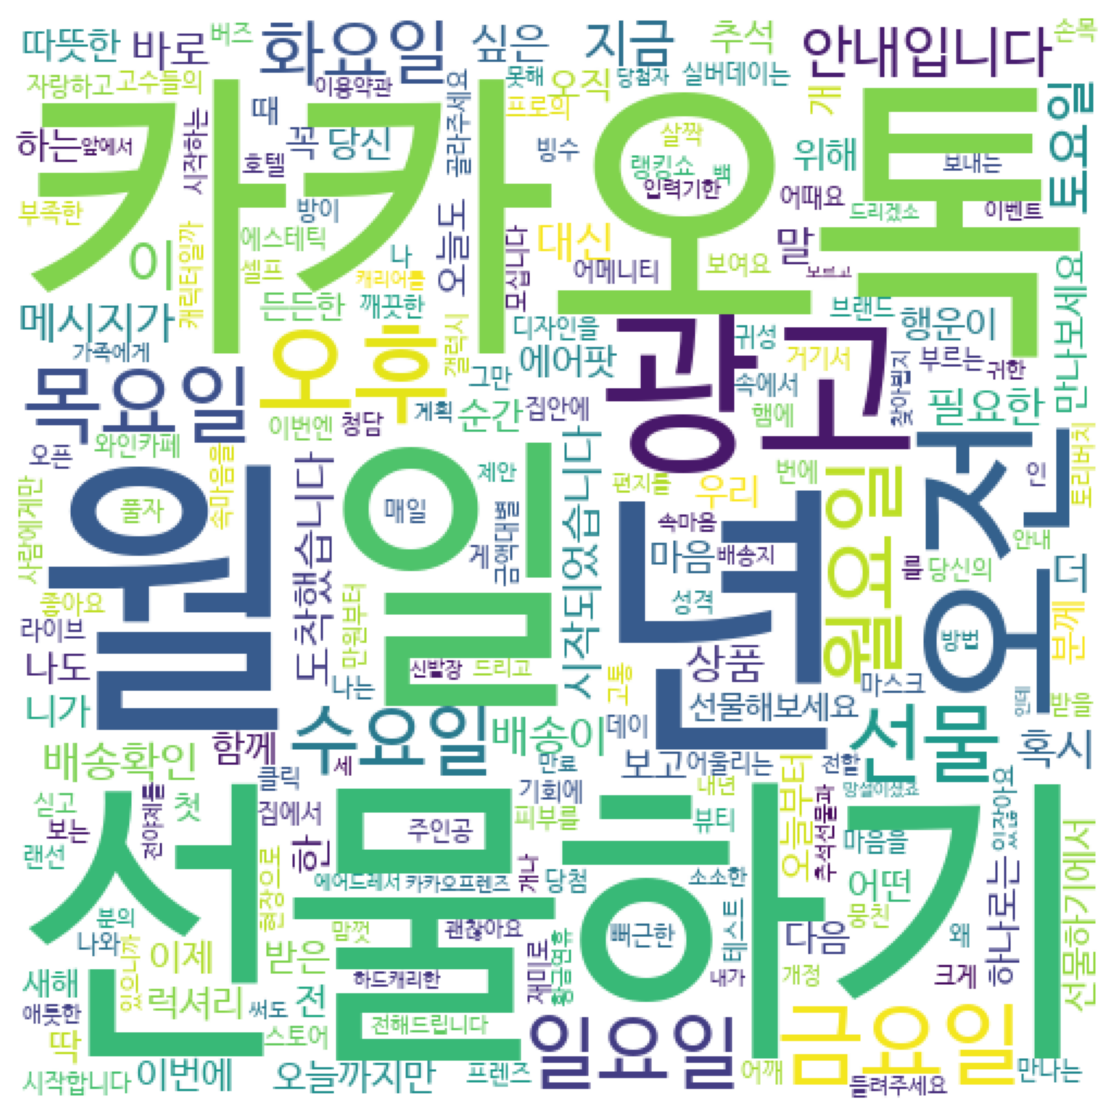

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()